In [6]:
import pathlib

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'figure.figsize':(8, 5), 'font.size':14, 'legend.fontsize':14})

import numpy as np
import astropy.units as u
from astropy.table import Table
from dust_extinction.parameter_averages import CCM89, F99
# from synphot import units, config
# from synphot import SourceSpectrum,SpectralElement,Observation,ExtinctionModel1D
# from synphot.models import BlackBodyNorm1D
# from synphot.spectrum import BaseUnitlessSpectrum
# from synphot.reddening import ExtinctionCurve
# from astroquery.simbad import Simbad
# from astroquery.mast import Observations
import astropy.visualization
astropy.visualization.quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fa2fa01d910>

In [2]:
Rv = 3.1 ### consistently used for GROND stuff, so I do as well

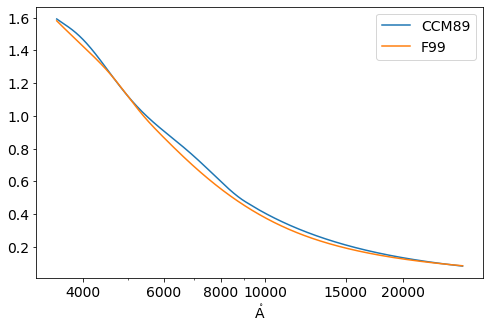

In [14]:
wavelen = np.linspace(3500, 27000, 1000)*u.AA

model1 = CCM89(Rv)
model2 = F99(Rv)

plt.semilogx(wavelen, model1(wavelen), label='CCM89')
plt.semilogx(wavelen, model2(wavelen), label='F99')
xtick = [4000, 6000, 8000, 10000, 15000, 20000]

plt.legend()        
plt.gca().xaxis.set_ticks(xtick)
plt.gca().xaxis.set_ticklabels(['%i'%i for i in xtick])

plt.show()

In [4]:
!ls Other/u*dat > spectral_files.txt

In [5]:
with open('spectral_files.txt', 'r') as top:
    files = top.readlines()

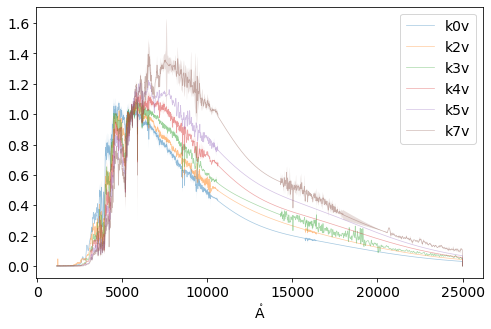

In [7]:
plt.figure()

for i, file in enumerate(files):
    label = file.strip().split('/')[-1].replace('uk','').split('.')[0]
    
    if len(label) != 3 or label[-1] != 'v':
        continue
    
    wav, flux, dflux = np.loadtxt(file.strip(), usecols=(0, 1, 2), unpack=True)
    
    wav = wav * u.AA
    
    plt.fill_between(wav, flux+dflux, flux-dflux, alpha=0.2)
    plt.plot(wav, flux, alpha=0.4, label=label, linewidth=0.7)
    
# plt.xlabel(r'$\lambda\ [\AA]$')
# plt.ylabel(r'$F_\lambda$ (normalized at 5556$\AA$)')

plt.legend()

plt.show()

In [18]:
used_spectral_types = ['k2v', 'k4v', 'k7v']
spec_abs_mags = {'k2v':6.4, 'k4v':7.0, 'k7v':8.1}   ### Tabelle Jochen

In [19]:
### flux of magnitude 0 star in band (taken from http://ned.ipac.caltech.edu/help/photoband.lst)
wav_g = 4825 * u.AA
### d nu/nu = d lambda/lambda
d_wav_g = wav_g * 0.286
zeroflux_g_nu = 3.631e-23 * u.Watt/(u.m*u.m*u.Hz)

wav_r = 6261 * u.AA
d_wav_r = wav_r * 0.221
zeroflux_r_nu = 3.631e-23 * u.Watt/(u.m*u.m*u.Hz)

wav_i = 7672 * u.AA
d_wav_i = wav_i * 0.203
zeroflux_i_nu = 3.631e-23 * u.Watt/(u.m*u.m*u.Hz)

wav_z = 9097 * u.AA
d_wav_z = wav_z * 0.151
zeroflux_z_nu = 3.631e-23 * u.Watt/(u.m*u.m*u.Hz)

wav_J = 1.25 * u.micron
d_wav_J = wav_J * 0.21
zeroflux_J_nu = 3.631e-23 * u.Watt/(u.m*u.m*u.Hz)

wav_H = 1.65 * u.micron
d_wav_H = wav_H * 0.18
zeroflux_H_nu = 3.631e-23 * u.Watt/(u.m*u.m*u.Hz)

wav_K = 2.17 * u.micron
d_wav_K = wav_K * 0.15
zeroflux_K_nu = 3.631e-23 * u.Watt/(u.m*u.m*u.Hz)

### conversion to F_lambda

zeroflux_g = zeroflux_g_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_g))
zeroflux_r = zeroflux_r_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_r))
zeroflux_i = zeroflux_i_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_i))
zeroflux_z = zeroflux_z_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_z))
zeroflux_J = zeroflux_J_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_J))
zeroflux_H = zeroflux_H_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_H))
zeroflux_K = zeroflux_K_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_K))

In [20]:
def GetSourceMagAtPhase(infile, target_phase=0):
    ph, mag, magerr = np.loadtxt(infile, usecols=(1, 2, 3), unpack=True)
    return mag[np.argmin(ph)], magerr[np.argmin(ph)]

In [21]:
mag_g , dmag_g = GetSourceMagAtPhase('/home/yahecker/Obs_Data/A0620/mag_g_red.txt')
flux_g = zeroflux_g * 10**(-0.4 * mag_g)
dflux_g = flux_g * 10./np.log(2.5) * dmag_g

mag_r , dmag_r = GetSourceMagAtPhase('/home/yahecker/Obs_Data/A0620/mag_r_red.txt')
flux_r = zeroflux_r * 10**(-0.4 * mag_r)
dflux_r = flux_r * 10./np.log(2.5) * dmag_r

mag_i , dmag_i = GetSourceMagAtPhase('/home/yahecker/Obs_Data/A0620/mag_i_red.txt')
flux_i = zeroflux_i * 10**(-0.4 * mag_i)
dflux_i = flux_i * 10./np.log(2.5) * dmag_i

mag_z , dmag_z = GetSourceMagAtPhase('/home/yahecker/Obs_Data/A0620/mag_z_red.txt')
flux_z = zeroflux_z * 10**(-0.4 * mag_z)
dflux_z = flux_z * 10./np.log(2.5) * dmag_z

mag_J , dmag_J = GetSourceMagAtPhase('/home/yahecker/Obs_Data/A0620/mag_J_red.txt')
flux_J = zeroflux_J * 10**(-0.4 * mag_J)
dflux_J = flux_J * 10./np.log(2.5) * dmag_J

mag_H , dmag_H = GetSourceMagAtPhase('/home/yahecker/Obs_Data/A0620/mag_H_red.txt')
flux_H = zeroflux_H * 10**(-0.4 * mag_H)
dflux_H = flux_H * 10./np.log(2.5) * dmag_H

mag_K , dmag_K = GetSourceMagAtPhase('/home/yahecker/Obs_Data/A0620/mag_K_red.txt')
flux_K = zeroflux_K * 10**(-0.4 * mag_K)
dflux_K = flux_K * 10./np.log(2.5) * dmag_K

In [12]:
key = '68_3950_2500_0_6000_2500_437'

with open(f'/home/yahecker/FluxA06/XRbparallel/XRbpar1/{key}_tmp.LC', 'r') as file:
    for j in range(6):
        line = file.readline()
    components = line.split()
    g_disk, r_disk, i_disk, z_disk, J_disk, H_disk, K_disk = np.float64(components[3::4])*u.erg/u.AA/u.cm/u.cm/u.s
    g_star_test, r_star_test, i_star_test, z_star_test, J_star_test, H_star_test, K_star_test = np.float64(components[4::4])*u.erg/u.AA/u.cm/u.cm/u.s

FileNotFoundError: [Errno 2] No such file or directory: '/home/yahecker/FluxA06/XRbparallel/XRbpar1/68_3950_2500_0_6000_2500_437_tmp.LC'

In [22]:
### load the spectra
wav_k2v, flux_k2v = np.loadtxt(f'/home/yahecker/data/Other/ukk2v.dat', usecols=(0, 1), unpack=True)
wav_k4v, flux_k4v = np.loadtxt(f'/home/yahecker/data/Other/ukk4v.dat', usecols=(0, 1), unpack=True)
wav_k7v, flux_k7v = np.loadtxt(f'/home/yahecker/data/Other/ukk7v.dat', usecols=(0, 1), unpack=True)

### convert them to physically useful quantities
flux_k2v = flux_k2v * 10**(-0.4 * spec_abs_mags['k2v'] - 8.43)*u.erg/u.AA/u.cm/u.cm/u.s
flux_k4v = flux_k4v * 10**(-0.4 * spec_abs_mags['k4v'] - 8.43)*u.erg/u.AA/u.cm/u.cm/u.s
flux_k7v = flux_k7v * 10**(-0.4 * spec_abs_mags['k7v'] - 8.43)*u.erg/u.AA/u.cm/u.cm/u.s
wav_k2v = wav_k2v * u.AA
wav_k4v = wav_k4v * u.AA
wav_k7v = wav_k7v * u.AA

In [14]:
AVs_to_test = np.linspace(0.5, 0.9, 5)

NameError: name 'g_disk' is not defined

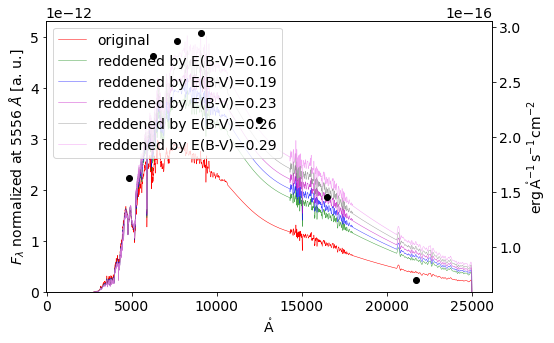

In [15]:
fig, ax1 = plt.subplots()

ext = F99(Rv=3.1)

colorcodes = ['g', 'b', 'm', 'grey', 'violet']

ax1.plot(wav_k7v, flux_k7v, 'r', linewidth=0.5, label='original')
# ax1.plot(wav, flux/ext.extinguish(wav, Ebv=0.3), linewidth=0.5, label='de-reddened')
# for i, Ebv in enumerate(np.array([0.6, 0.7, 0.8])/Rv):
for i, Ebv in enumerate(AVs_to_test/Rv):
    ax1.plot(wav_k7v, flux_k7v*ext.extinguish(wav, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), color=colorcodes[i], linewidth=0.5, alpha=0.7, label=f'reddened by E(B-V)={Ebv:.2f}')

_, ymax = ax1.get_ylim()
ax1.set_ylim([0, ymax])
ax1.set_ylabel(r'$F_\lambda$ normalized at 5556 $\AA$ [a. u.]')

plt.legend(loc=2)

ax2 = ax1.twinx()

### plotting the A06 data
ax2.plot(wav_g, flux_g, 'ko', label='A06 data around phase 0')
ax2.plot(wav_r, flux_r, 'ko')
ax2.plot(wav_i, flux_i, 'ko')
ax2.plot(wav_z, flux_z, 'ko')
ax2.plot(wav_J, flux_J, 'ko')
ax2.plot(wav_H, flux_H, 'ko')
ax2.plot(wav_K, flux_K, 'ko')

### plotting the simulated disk data
ax2.plot(wav_g, g_disk, 'r^', alpha=0.5, label='Simulated disk SED')
ax2.plot(wav_r, r_disk, 'r^', alpha=0.5)
ax2.plot(wav_i, i_disk, 'r^', alpha=0.5)
ax2.plot(wav_z, z_disk, 'r^', alpha=0.5)
ax2.plot(wav_J, J_disk, 'r^', alpha=0.5)
ax2.plot(wav_H, H_disk, 'r^', alpha=0.5)
ax2.plot(wav_K, K_disk, 'r^', alpha=0.5)

for i, Ebv in enumerate(AVs_to_test/Rv):
    ax2.plot(wav_g, g_disk*ext.extinguish(wav_g, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='^', alpha=0.5, label=f'Simulated disk for E(B-V)={Ebv:.2f}')
    ax2.plot(wav_r, r_disk*ext.extinguish(wav_r, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='^', alpha=0.5)
    ax2.plot(wav_i, i_disk*ext.extinguish(wav_i, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='^', alpha=0.5)
    ax2.plot(wav_z, z_disk*ext.extinguish(wav_z, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='^', alpha=0.5)
    ax2.plot(wav_J, J_disk*ext.extinguish(wav_J, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='^', alpha=0.5)
    ax2.plot(wav_H, H_disk*ext.extinguish(wav_H, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='^', alpha=0.5)
    ax2.plot(wav_K, K_disk*ext.extinguish(wav_K, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='^', alpha=0.5)
    
    # ax2.plot(wav_g, flux_g - g_disk*ext.extinguish(wav_g, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5, label=f'Inferred star for E(B-V)={Ebv:.2f}')
    # ax2.plot(wav_r, flux_r - r_disk*ext.extinguish(wav_r, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5)
    # ax2.plot(wav_i, flux_i - i_disk*ext.extinguish(wav_i, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5)
    # ax2.plot(wav_z, flux_z - z_disk*ext.extinguish(wav_z, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5)
    # ax2.plot(wav_J, flux_J - J_disk*ext.extinguish(wav_J, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5)
    # ax2.plot(wav_H, flux_H - H_disk*ext.extinguish(wav_H, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5)
    # ax2.plot(wav_K, flux_K - K_disk*ext.extinguish(wav_K, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5)
    
    ax2.plot(wav_g, g_star_test*ext.extinguish(wav_g, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5, label=f'Simulated star for E(B-V)={Ebv:.2f}')
    ax2.plot(wav_r, r_star_test*ext.extinguish(wav_r, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5)
    ax2.plot(wav_i, i_star_test*ext.extinguish(wav_i, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5)
    ax2.plot(wav_z, z_star_test*ext.extinguish(wav_z, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5)
    ax2.plot(wav_J, J_star_test*ext.extinguish(wav_J, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5)
    ax2.plot(wav_H, H_star_test*ext.extinguish(wav_H, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5)
    ax2.plot(wav_K, K_star_test*ext.extinguish(wav_K, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv), color=colorcodes[i], marker='*', alpha=0.5)

### plotting the inferred 

_, ymax = ax2.get_ylim()
ax2.set_ylim([0, ymax*1.1])

# ax1.set_ylim([0, 4])

plt.legend(loc=1)

plt.title('K7V template')

plt.tight_layout()

xlims = plt.xlim()


plt.figure()

for i, Ebv in enumerate(AVs_to_test/Rv):
    plt.plot(wav_g, (g_disk + g_star_test)*ext.extinguish(wav_g, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv) - flux_g, color=colorcodes[i], marker='o', alpha=0.5, label=f'Residual for E(B-V)={Ebv:.2f}')
    plt.plot(wav_r, (r_disk + r_star_test)*ext.extinguish(wav_r, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv) - flux_r, color=colorcodes[i], marker='o', alpha=0.5)
    plt.plot(wav_i, (i_disk + i_star_test)*ext.extinguish(wav_i, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv) - flux_i, color=colorcodes[i], marker='o', alpha=0.5)
    plt.plot(wav_z, (z_disk + z_star_test)*ext.extinguish(wav_z, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv) - flux_z, color=colorcodes[i], marker='o', alpha=0.5)
    plt.plot(wav_J, (J_disk + J_star_test)*ext.extinguish(wav_J, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv) - flux_J, color=colorcodes[i], marker='o', alpha=0.5)
    plt.plot(wav_H, (H_disk + H_star_test)*ext.extinguish(wav_H, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv) - flux_H, color=colorcodes[i], marker='o', alpha=0.5)
    plt.plot(wav_K, (K_disk + K_star_test)*ext.extinguish(wav_K, Ebv=Ebv)/ext.extinguish(5556.*u.AA, Ebv=Ebv) - flux_K, color=colorcodes[i], marker='o', alpha=0.5)

plt.hlines(0, *xlims, colors='grey', linestyles='-', linewidths=0.5)
plt.legend()
plt.xlim(*xlims)
    
plt.show()

In [ ]:
Av = 0.6

print(f'Disk veiling in g band: {g_disk*ext.extinguish(wav_g, Av=Av)/ext.extinguish(5556.*u.AA, Av=Av) / flux_g:.3f}')
print(f'Disk veiling in r band: {r_disk*ext.extinguish(wav_r, Av=Av)/ext.extinguish(5556.*u.AA, Av=Av) / flux_r:.3f}')
print(f'Disk veiling in i band: {i_disk*ext.extinguish(wav_i, Av=Av)/ext.extinguish(5556.*u.AA, Av=Av) / flux_i:.3f}')
print(f'Disk veiling in z band: {z_disk*ext.extinguish(wav_z, Av=Av)/ext.extinguish(5556.*u.AA, Av=Av) / flux_z:.3f}')
print(f'Disk veiling in J band: {J_disk*ext.extinguish(wav_J, Av=Av)/ext.extinguish(5556.*u.AA, Av=Av) / flux_J:.3f}')
print(f'Disk veiling in H band: {H_disk*ext.extinguish(wav_H, Av=Av)/ext.extinguish(5556.*u.AA, Av=Av) / flux_H:.3f}')
print(f'Disk veiling in K band: {K_disk*ext.extinguish(wav_K, Av=Av)/ext.extinguish(5556.*u.AA, Av=Av) / flux_K:.3f}')

In [23]:
wav_k0v, flux_k0v = np.loadtxt(f'/home/yahecker/data/Other/ukk0v.dat', usecols=(0, 1), unpack=True)

In [18]:
# key = '69_4750_2810_12_3700_2810_437'
key = '69_4750_2700_5_2000_2700_437'

with open(f'/home/yahecker/FluxA06/XRbparallel/XRbpar1/{key}_tmp.LC', 'r') as file:
    for j in range(6):
        line = file.readline()
    components = line.split()
    g_disk, r_disk, i_disk, z_disk, J_disk, H_disk, K_disk = np.float64(components[3::4])*u.erg/u.AA/u.cm/u.cm/u.s

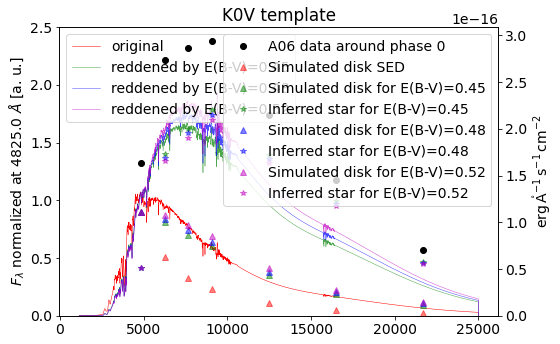

In [19]:
fig, ax1 = plt.subplots()

ext = F99(Rv=3.08)

ax1.plot(wav_k0v, flux_k0v, linewidth=0.5, color='r', label='original')
# ax1.plot(wav, flux/ext.extinguish(wav, Ebv=0.3), linewidth=0.5, label='de-reddened')
for i, Ebv in enumerate(np.array([1.4, 1.5, 1.6])/Rv):
    ax1.plot(wav_k0v, flux_k0v*ext.extinguish(wav, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), color=colorcodes[i], linewidth=0.5, alpha=0.7, label=f'reddened by E(B-V)={Ebv:.2f}')

_, ymax = ax1.get_ylim()
ax1.set_ylim([0, ymax])
ax1.set_ylabel(r'$F_\lambda$ normalized at {} $\AA$ [a. u.]'.format(wav_g.value))

plt.legend(loc=2)

ax2 = ax1.twinx()

ax2.plot(wav_g, flux_g, 'ko', label='A06 data around phase 0')
ax2.plot(wav_r, flux_r, 'ko')
ax2.plot(wav_i, flux_i, 'ko')
ax2.plot(wav_z, flux_z, 'ko')
ax2.plot(wav_J, flux_J, 'ko')
ax2.plot(wav_H, flux_H, 'ko')
ax2.plot(wav_K, flux_K, 'ko')


### plotting the simulated disk data
ax2.plot(wav_g, g_disk, 'r^', alpha=0.5, label='Simulated disk SED')
ax2.plot(wav_r, r_disk, 'r^', alpha=0.5)
ax2.plot(wav_i, i_disk, 'r^', alpha=0.5)
ax2.plot(wav_z, z_disk, 'r^', alpha=0.5)
ax2.plot(wav_J, J_disk, 'r^', alpha=0.5)
ax2.plot(wav_H, H_disk, 'r^', alpha=0.5)
ax2.plot(wav_K, K_disk, 'r^', alpha=0.5)


for i, Ebv in enumerate(np.array([1.4, 1.5, 1.6])/Rv):
    ax2.plot(wav_g, g_disk*ext.extinguish(wav_g, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}^', alpha=0.5, label=f'Simulated disk for E(B-V)={Ebv:.2f}')
    ax2.plot(wav_r, r_disk*ext.extinguish(wav_r, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}^', alpha=0.5)
    ax2.plot(wav_i, i_disk*ext.extinguish(wav_i, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}^', alpha=0.5)
    ax2.plot(wav_z, z_disk*ext.extinguish(wav_z, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}^', alpha=0.5)
    ax2.plot(wav_J, J_disk*ext.extinguish(wav_J, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}^', alpha=0.5)
    ax2.plot(wav_H, H_disk*ext.extinguish(wav_H, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}^', alpha=0.5)
    ax2.plot(wav_K, K_disk*ext.extinguish(wav_K, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}^', alpha=0.5)
    
    ax2.plot(wav_g, flux_g - g_disk*ext.extinguish(wav_g, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}*', alpha=0.5, label=f'Inferred star for E(B-V)={Ebv:.2f}')
    ax2.plot(wav_r, flux_r - r_disk*ext.extinguish(wav_r, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}*', alpha=0.5)
    ax2.plot(wav_i, flux_i - i_disk*ext.extinguish(wav_i, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}*', alpha=0.5)
    ax2.plot(wav_z, flux_z - z_disk*ext.extinguish(wav_z, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}*', alpha=0.5)
    ax2.plot(wav_J, flux_J - J_disk*ext.extinguish(wav_J, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}*', alpha=0.5)
    ax2.plot(wav_H, flux_H - H_disk*ext.extinguish(wav_H, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}*', alpha=0.5)
    ax2.plot(wav_K, flux_K - K_disk*ext.extinguish(wav_K, Ebv=Ebv)/ext.extinguish(wav_g, Ebv=Ebv), f'{colorcodes[i]}*', alpha=0.5)

_, ymax = ax2.get_ylim()
ax2.set_ylim([0, ymax])

ax1.set_ylim([0, 2.5])

plt.legend(loc=1)

plt.title('K0V template')

plt.tight_layout()

plt.show()

In [20]:
Av = 1.6

print(f'Disk veiling in g band: {g_disk*ext.extinguish(wav_g, Av=Av)/ext.extinguish(wav_g, Av=Av) / flux_g:.3f}')
print(f'Disk veiling in r band: {r_disk*ext.extinguish(wav_r, Av=Av)/ext.extinguish(wav_g, Av=Av) / flux_r:.3f}')
print(f'Disk veiling in i band: {i_disk*ext.extinguish(wav_i, Av=Av)/ext.extinguish(wav_g, Av=Av) / flux_i:.3f}')
print(f'Disk veiling in z band: {z_disk*ext.extinguish(wav_z, Av=Av)/ext.extinguish(wav_g, Av=Av) / flux_z:.3f}')
print(f'Disk veiling in J band: {J_disk*ext.extinguish(wav_J, Av=Av)/ext.extinguish(wav_g, Av=Av) / flux_J:.3f}')
print(f'Disk veiling in H band: {H_disk*ext.extinguish(wav_H, Av=Av)/ext.extinguish(wav_g, Av=Av) / flux_H:.3f}')
print(f'Disk veiling in K band: {K_disk*ext.extinguish(wav_K, Av=Av)/ext.extinguish(wav_g, Av=Av) / flux_K:.3f}')

Disk veiling in g band: 0.683
Disk veiling in r band: 0.395
Disk veiling in i band: 0.339
Disk veiling in z band: 0.290
Disk veiling in J band: 0.242
Disk veiling in H band: 0.195
Disk veiling in K band: 0.211


In [21]:
with open(f'/home/yahecker/FluxA06/XRbparallel/XRbpar1/{key}_tmp.LC', 'r') as file:
    for j in range(6):
        line = file.readline()
    components = line.split()
    g_disk, r_disk, i_disk, z_disk, J_disk, H_disk, K_disk = np.float64(components[3::4])

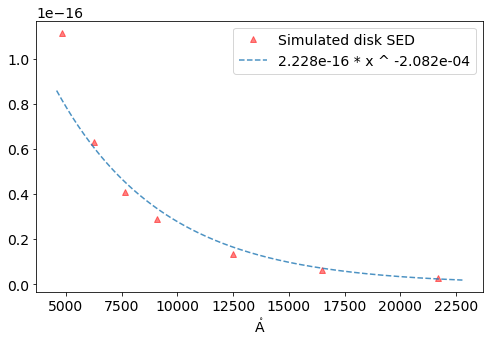

In [22]:
3950### plotting the simulated disk data
plt.figure()

plt.plot(wav_g, g_disk, 'r^', alpha=0.5, label='Simulated disk SED')
plt.plot(wav_r, r_disk, 'r^', alpha=0.5)
plt.plot(wav_i, i_disk, 'r^', alpha=0.5)
plt.plot(wav_z, z_disk, 'r^', alpha=0.5)
plt.plot(wav_J, J_disk, 'r^', alpha=0.5)
plt.plot(wav_H, H_disk, 'r^', alpha=0.5)
plt.plot(wav_K, K_disk, 'r^', alpha=0.5)

unitless_wavs = np.array([wav_g.value, wav_r.value, wav_i.value, wav_z.value, wav_J.value*1e4, wav_H.value*1e4, wav_K.value*1e4])

coeffs = np.polyfit(unitless_wavs, np.log(np.array([g_disk, r_disk, i_disk, z_disk, J_disk, H_disk, K_disk])), 1)

x = np.linspace(np.min(unitless_wavs)*0.95, np.max(unitless_wavs)*1.05, 300)

plt.plot(x, np.exp(coeffs[0]*x + coeffs[1]), '--', alpha=0.8, label=f'{np.exp(coeffs[1]):.3e} * x ^ {coeffs[0]:.3e}')

plt.legend()

In [23]:
wav_g.unit, wav_K.unit

(Unit("Angstrom"), Unit("micron"))

In [24]:
coeffs

array([-2.08167863e-04, -3.60400484e+01])

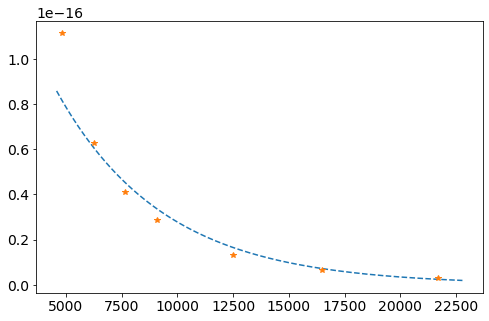

In [25]:
plt.plot(x, np.exp(coeffs[0]*x + coeffs[1]), '--')
plt.plot(unitless_wavs, np.array([g_disk, r_disk, i_disk, z_disk, J_disk, H_disk, K_disk]), '*')

# Actual Result production region

In [33]:
### function. take args and procude plot
### arguments: AV (array), template spectrum wl and normalized flux, absolute mag, data (?)

def PlotProducer(AV_array, spectrum_wls, spectrum_norm_flux, M_abs_star, phot_data, spec_type=None, Rv=3.1, ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 7))
        
    if spec_type is None:
        spec_type = '[not provided]'
        
    ext = F99(Rv)
    
    colorcodes = plt.get_cmap('viridis').colors[0:255:255//np.size(AV_array)]
    shapes = ['o', '*', '^']
    
    # ax.plot(spectrum_wls, spectrum_norm_flux, color='tomato', linewidth=0.5, label='Unreddened', alpha=0.7)
    
    for i, AV in enumerate(AV_array):
        ax.plot(spectrum_wls,
                spectrum_norm_flux * ext.extinguish(spectrum_wls, Av=AV), # / ext.extinguish(5556.*u.AA, Av=AV),
                color=colorcodes[np.size(AV_array) - i - 1],
                linewidth=0.5,
                label=f'reddened by AV = {AV:.2f}'
               )
    
    ax.legend(title=spec_type)
    
    _, ymax = ax.get_ylim()
    ax.set_ylim([0, ymax])
    ax.set_xlim([0, np.max(spectrum_wls)])

In [37]:
AVs_to_test = np.linspace(0, 1.0, 6)

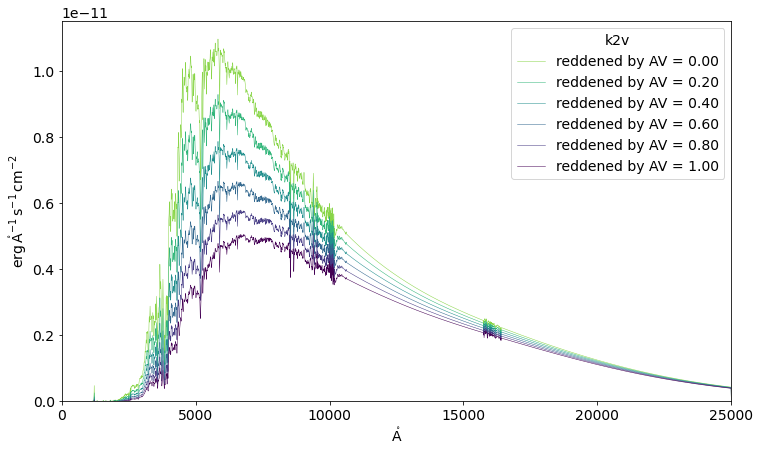

In [39]:
PlotProducer(AVs_to_test, wav_k2v, flux_k2v, spec_abs_mags['k2v'], None, 'k2v')
# PlotProducer(AVs_to_test, wav_k4v, flux_k4v, spec_abs_mags['k4v'], None, 'k4v')
# PlotProducer(AVs_to_test, wav_k7v, flux_k7v, spec_abs_mags['k7v'], None, 'k7v')
plt.savefig('plots/reddening_K2V_illustration.pdf', format='pdf')
plt.show()

In [20]:
with open('/home/yahecker/av.txt', 'r') as head:
    AVs = head.readline().strip()
    DISTS = head.readline().strip()
AV_north = np.array(AVs.strip('[').strip(']').split(','), dtype=np.float64)
dists = np.array(DISTS.strip('[').strip(']').split(','), dtype=np.float64)

In [30]:
dists

array([ 199.5262315 ,  210.86281499,  223.87211386,  237.68402866,
        251.18864315,  265.4605562 ,  281.83829313,  299.22646366,
        316.22776602,  334.19504003,  354.81338923,  376.70379898,
        398.10717055,  420.72662838,  446.68359215,  474.24198526,
        501.18723363,  529.66344389,  562.34132519,  597.03528658,
        630.95734448,  666.80676921,  707.94578438,  751.62289402,
        794.32823472,  839.45998652,  891.25093813,  946.23716137,
       1000.        , 1056.81750921, 1122.0184543 , 1191.24200803,
       1258.92541179, 1330.45441798, 1412.53754462, 1499.6848355 ,
       1584.89319246, 1674.94287603, 1778.27941004, 1887.9913491 ,
       1995.26231497, 2108.62814993, 2238.72113857, 2376.84028662,
       2511.88643151, 2654.60556198, 2818.38293126, 2992.26463661,
       3162.27766017, 3341.95040026, 3548.13389234, 3767.03798984,
       3981.07170553, 4207.26628384, 4466.83592151, 4742.4198526 ,
       5011.87233627, 5296.63443892, 5623.4132519 , 5970.35286

In [21]:
distances, AV_north, AV_south, AV_all = np.loadtxt('/home/yahecker/AV_towards_A0620.txt', unpack=True)

In [32]:
distances

array([ 199.5262315 ,  210.86281499,  223.87211386,  237.68402866,
        251.18864315,  265.4605562 ,  281.83829313,  299.22646366,
        316.22776602,  334.19504003,  354.81338923,  376.70379898,
        398.10717055,  420.72662838,  446.68359215,  474.24198526,
        501.18723363,  529.66344389,  562.34132519,  597.03528658,
        630.95734448,  666.80676921,  707.94578438,  751.62289402,
        794.32823472,  839.45998652,  891.25093813,  946.23716137,
       1000.        , 1056.81750921, 1122.0184543 , 1191.24200803,
       1258.92541179, 1330.45441798, 1412.53754462, 1499.6848355 ,
       1584.89319246, 1674.94287603, 1778.27941004, 1887.9913491 ,
       1995.26231497, 2108.62814993, 2238.72113857, 2376.84028662,
       2511.88643151, 2654.60556198, 2818.38293126, 2992.26463661,
       3162.27766017, 3341.95040026, 3548.13389234, 3767.03798984,
       3981.07170553, 4207.26628384, 4466.83592151, 4742.4198526 ,
       5011.87233627, 5296.63443892, 5623.4132519 , 5970.35286

In [33]:
np.savetxt('/home/yahecker/AV_towards_A0620.txt', 
           np.array([dists, AV_north, AV_south, AV_all]).transpose(),
           fmt='%.8f',
           header='distance, Green 2019, Guo 2021 south, Guo 2021 all'
          )

In [22]:
distances[np.argwhere(AV_north > 0.5)[0]]

array([376.70379898])

In [23]:
distances[np.argwhere(AV_north < 0.6)[-1]]

array([529.66344389])

In [24]:
AV_north[distances==376.70379898]

array([0.50096386])

In [25]:
AV_north[distances==529.66344389]

array([0.58445783])

In [26]:
AV_north[distances==562.34132519]

array([0.66795181])

## Loop for m and d calibration

In [40]:
def ConvolveSpectrum(input_wl, input_spectrum, filter_kernel, band_index=1, integrate=False):
    '''Convolve a spectrum with a given filter kernel (i.e. transmission curve).'''
    
    # wavelengths = ExtractWavelengths(input_spectrum)
        
    # if wavelengths.shape != filter_kernel[0].shape:
        
    #print('WARNING: Spectrum and kernel shapes incompatible. Using interpolation of filter transmission curve.')
        
    ### return the integral interpolated transmission curve * spectrum / integral transmission curve
    area = np.interp(input_wl, filter_kernel[0]*u.AA, filter_kernel[band_index], left=0, right=0)
    
    if integrate:
        
        ### for not evenly spaced wavelengths, this will make a difference
        ### this is, at best, rudimentary, but with sufficient spectral resolution, the result should be fine
        d_wl = np.diff(input_wl, append=input_wl[1]-input_wl[0])
    
        return np.sum(input_spectrum * area * d_wl) / np.sum(area * d_wl)
    
    return input_spectrum * area
    
    # return np.where(wavelengths==filter_kernel[0]*u.AA), input_spectrum*filter_kernel[band_index]
    

In [41]:
GROND_transmissions = np.loadtxt('/home/yahecker/GROND_transmissions.txt', unpack=True)

### convert the wavelengths saved from nm to A
GROND_transmissions[0] = GROND_transmissions[0] * 10

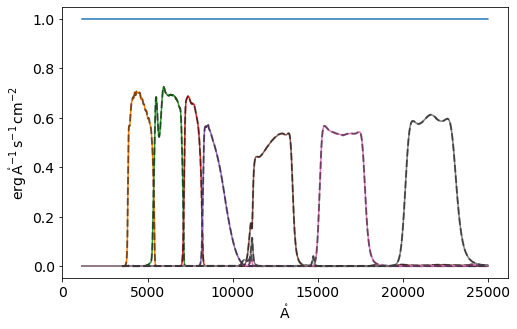

In [42]:
plt.plot(wav_k2v, np.ones_like(flux_k2v))
for i in range(1, 8):
    plt.plot(wav_k2v, ConvolveSpectrum(wav_k2v, np.ones_like(flux_k2v), GROND_transmissions, i))
    plt.plot(GROND_transmissions[0], GROND_transmissions[i], 'k--', linewidth=2, alpha=0.5)


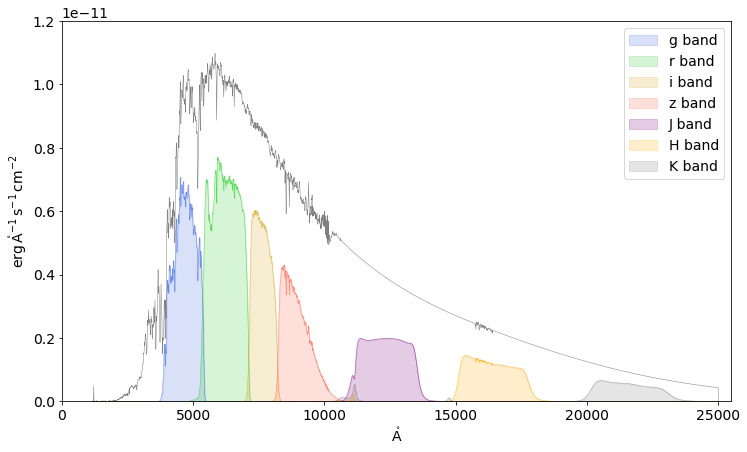

In [53]:
lColor=['royalblue', 'limegreen', 'goldenrod', 'tomato', 'purple', 'orange', 'grey']

bands = 'g r i z J H K'.split()

plt.figure(figsize=(12, 7))

plt.plot(wav_k2v, flux_k2v, linewidth=0.5, alpha=0.5, color='k')
for i in range(1, 8):
    plt.plot(wav_k2v, ConvolveSpectrum(wav_k2v, flux_k2v, GROND_transmissions, i), 
             alpha=0.7, linewidth=0.5, color=lColor[i-1])
    plt.fill_between(wav_k2v, ConvolveSpectrum(wav_k2v, flux_k2v, GROND_transmissions, i), 0,
                     alpha=0.2, color=lColor[i-1], label=f'{bands[i-1]} band')

# plt.yscale('log')
plt.ylim([0, 1.2e-11])
plt.xlim([0, 1.02*np.max(wav_k2v)])
plt.legend()

plt.savefig('plots/convolution_GROND_K2V.pdf', format='pdf')

plt.show()

In [35]:
ConvolveSpectrum(wav_k2v, flux_k2v, GROND_transmissions, 1, True)

<Quantity 7.81422145e-12 erg / (Angstrom cm2 s)>

In [36]:
ConvolveSpectrum(wav_k2v, flux_k2v, GROND_transmissions, 1, True)

<Quantity 7.81422145e-12 erg / (Angstrom cm2 s)>

### Testing the linearity in AV and the bands

In [54]:
### function. take args and procude plot
### arguments: AV (array), template spectrum wl and normalized flux, absolute mag, data (?)

def TesterForAV(AV_array, spectrum_wls, spectrum_norm_flux, M_abs_star, phot_data=None, spec_type=None, Rv=3.1, ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 7))
        
    if spec_type is None:
        spec_type = '[not provided]'
        
    wavs = [wav_g, wav_r, wav_i, wav_z, wav_J, wav_H, wav_K]
        
    ext = F99(Rv)
    
    colorcodes = plt.get_cmap('viridis').colors[0:255:255//np.size(AV_array)]
    shapes = ['o', '*', '^']
    
    magnitudes = np.zeros((np.size(AV_array), 7))
    
    ax.plot(spectrum_wls, spectrum_norm_flux, color='tomato', linewidth=0.5, label='Unreddened', alpha=0.7)
    
    for i, AV in enumerate(AV_array):
        ax.plot(spectrum_wls,
                spectrum_norm_flux * ext.extinguish(spectrum_wls, Av=AV), # / ext.extinguish(5556.*u.AA, Av=AV),
                color=colorcodes[i],
                linewidth=0.5,
                label=f'reddened by AV = {AV:.2f}'
               )
        
        for j in range(7):
            temp = ConvolveSpectrum(spectrum_wls,
                                 spectrum_norm_flux * ext.extinguish(spectrum_wls, Av=AV),
                                 GROND_transmissions,
                                 j+1,
                                 True)
            
            magnitudes[i][j] = temp.to(u.erg / (u.cm**2 * u.s * u.Hz), equivalencies=u.spectral_density(wavs[j])).value
            
            
    ax.legend(title=spec_type, loc=(1.02, 0))
    
    _, ymax = ax.get_ylim()
    ax.set_ylim([0, ymax])
    ax.set_xlim([0, np.max(spectrum_wls)])
    
    return -2.5*np.log10(magnitudes) - 48.6

In [56]:
### reference values
extinction_factors = {'g':1.282,
                      'r':0.897,
                      'i':0.641,
                      'z':0.513,
                      'J':0.385,
                      'H':0.256,
                      'K':0.128
                     }

Fit returns y(A_V) = 1.190*A_V + -0.117 for the g (tabulated: 1.282)
Fit returns y(A_V) = 0.816*A_V + -0.080 for the r (tabulated: 0.897)
Fit returns y(A_V) = 0.597*A_V + -0.060 for the i (tabulated: 0.641)
Fit returns y(A_V) = 0.457*A_V + -0.045 for the z (tabulated: 0.513)
Fit returns y(A_V) = 0.265*A_V + -0.026 for the J (tabulated: 0.385)
Fit returns y(A_V) = 0.170*A_V + -0.017 for the H (tabulated: 0.256)
Fit returns y(A_V) = 0.127*A_V + -0.012 for the K (tabulated: 0.128)


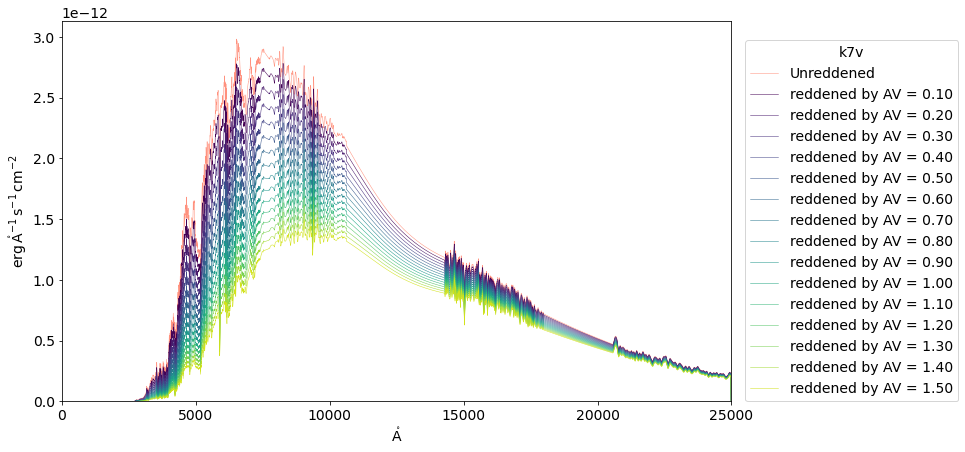

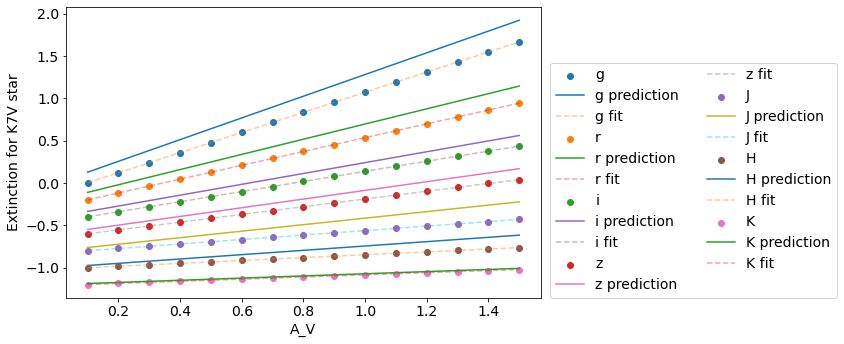

In [57]:
x = np.linspace(0.1, 1.5, 15)

reddenings = TesterForAV(x, wav_k7v, flux_k7v, spec_abs_mags['k7v'], spec_type='k7v')

plt.figure(figsize=(12,5))

for j, band in enumerate('g r i z J H K'.split()):
    
    plt.scatter(x, reddenings[:, j] - reddenings[0, j] - j/5, label=band)
    plt.plot(x, extinction_factors[band]*x - j/5, label=f'{band} prediction')
    
    a, b = np.polyfit(x, reddenings[:, j] - reddenings[0, j], 1)
    
    print(f"Fit returns y(A_V) = {a:.3f}*A_V + {b:.3f} for the {band} (tabulated: {extinction_factors[band]})")
    
    plt.plot(x, a*x + b - j/5, alpha=0.4, linestyle='--', label=f'{band} fit')

plt.xlabel("A_V")
plt.ylabel("Extinction for K7V star")
plt.legend(ncol=2, loc=(1.02, 0))
plt.tight_layout()

In [59]:
def DistanceBrightnessCalibration(spec_wl, spec_flux, AV, filter_kernel, band_index, band_wl, dist_arr=None, AV_arr=None, AV_tol=None, veiling=None):
    
    assert dist_arr is not None and AV_arr is not None, 'Please provide an array of distances and an array of corresponding AV values.'
    
    assert type(spec_wl) is astropy.units.quantity.Quantity and type(spec_flux) is astropy.units.quantity.Quantity, 'Please provide physical fluxes at 10pc distance!'
    
    ### convenience
    max_AV = np.max(AV_arr)
    
    ### set an extinction law
    ext = F99(3.1)
    
    ### redden the input spectrum
    reddened_flux = spec_flux * ext.extinguish(spec_wl, Av=AV)
    
    # target_wl = spec_wl[np.argmin( (spec_wl - band_wl)**2 )]
    # reddened_abs_mag = -2.5 * (np.log10(reddened_flux[spec_wl==target_wl].value) + 8.43)
    
    ### check whether the AV in question is even viable
    if AV > max_AV:
        print(f'Warning: AV ({AV}) exceeds maximum value in line of sight ({np.max(AV_arr)}).\n' +
             f'Returning Nones for {AV=}.')
        return None, None
    
    ############# MAYBE USE INTERPOLATION? ###############
    
    ### get the furthest distance that is still below the AV in question
    distance = dist_arr[np.argwhere(AV_arr <= AV)[-1]]
    
    if AV_tol is not None:
        
        if AV + AV_tol > max_AV:
            
            print(f"AV can't exceed {max_AV}. Maximum tolerance set to {max_AV - AV}")
            AV_tol = max_AV - AV

        distance = dist_arr[np.argwhere(AV_arr <= AV + AV_tol)[-1]]
    
    ### dim the received flux by a factor of 1/r^2 * R^2 (with R=10pc)
    dimmed_flux = reddened_flux * (10. / distance)**2
    
    ### convolve the dimmed spectrum with the GROND transmission curves and return the normalized integral
    integrated_dimmed_flux = ConvolveSpectrum(spec_wl, dimmed_flux, filter_kernel, band_index, True)
    
    ### convert the normalized integral to F_nu
    F_nu = integrated_dimmed_flux.to(u.erg / (u.cm**2 * u.s * u.Hz), equivalencies=u.spectral_density(band_wl))
    
    ### lastly, convert the F_nu to an observed magnitude:
    
    m_obs = -2.5 * np.log10(F_nu.value) - 48.6
    
    # m_obs = reddened_abs_mag + 5 * np.log10(distance) - 5
    # flux_obs = 10**(-0.4*m_obs - 8.43)*u.erg/u.cm/u.cm/u.s/u.AA
    # converted_flux_obs = flux_obs.to(u.erg/u.s/u.cm/u.cm/u.Hz, equivalencies=u.spectral_density(band_wl))
    # m_obs = -2.5 * np.log10(converted_flux_obs.value) - 48.6
    
    if veiling is not None:
        if not 0 < veiling < 1:
            print(f'Non-stellar flux contributes unphysical ratio ({veiling*100:.2f}% of total flux). Ignoring input.')
        else:
            print(f'Veiling observed magnitude by {veiling*100:.2f}%.')
            corr_mag = -2.5*np.log10(veiling)
            m_obs = m_obs + corr_mag
    
    return float(m_obs), float(distance)

In [60]:
DistanceBrightnessCalibration(wav_k7v, flux_k7v, 0.0, GROND_transmissions, 2, wav_r, dist_arr=distances, AV_arr=AV_north, veiling=0.0)


Non-stellar flux contributes unphysical ratio (0.00% of total flux). Ignoring input.


(14.640878074442497, 251.18864315)

In [61]:
DistanceBrightnessCalibration(wav_k7v, flux_k7v, 0.0, GROND_transmissions, 2, wav_r, dist_arr=distances, AV_arr=AV_north, veiling=0.1)

Veiling observed magnitude by 10.00%.


(17.140878074442497, 251.18864315)

## Time to build some loops

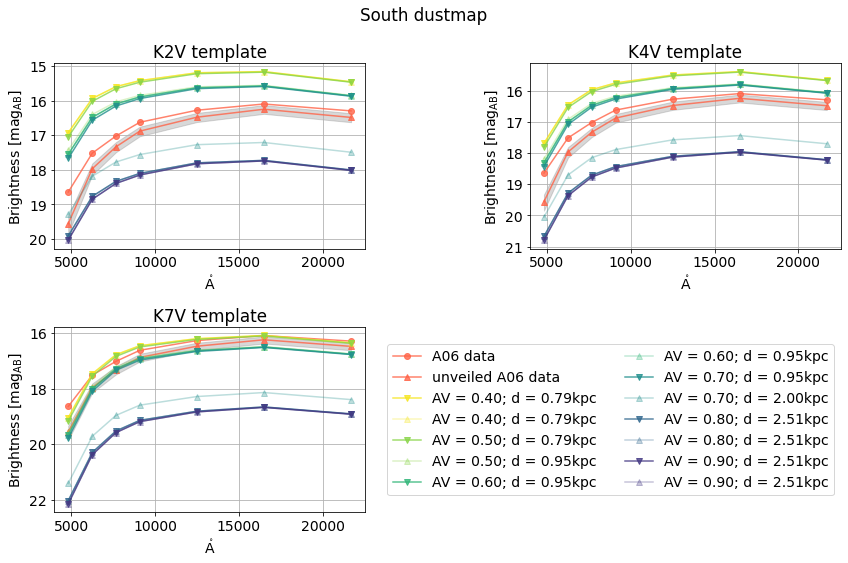

In [66]:
wls = np.array([wav_g.value, wav_r.value, wav_i.value, wav_z.value, wav_J.to(u.AA).value, wav_H.to(u.AA).value, wav_K.to(u.AA).value])*u.AA
veilings      = np.array([0.57, 0.34, 0.25, 0.21, 0.17, 0.13, 0.16])
veilings_low  = np.array([0.47, 0.24, 0.15, 0.11, 0.07, 0.03, 0.06])
veilings_high = np.array([0.67, 0.44, 0.35, 0.31, 0.27, 0.23, 0.26])
# g band: 0.57 (0.53, 0.61)
# r band: 0.34 (0.29, 0.39)
# i band: 0.25 (0.20, 0.30)
# z band: 0.21 (0.16, 0.26)
# J band: 0.17 (0.12, 0.21)
# H band: 0.13 (0.09, 0.17)
# K band: 0.16 (0.10, 0.21)

veiled_mags = np.array([mag_g, mag_r, mag_i, mag_z, mag_J, mag_H, mag_K]) - 2.5*np.log10(1 - veilings)
low_veiled_mags = np.array([mag_g, mag_r, mag_i, mag_z, mag_J, mag_H, mag_K]) - 2.5*np.log10(1 - veilings_low)
high_veiled_mags = np.array([mag_g, mag_r, mag_i, mag_z, mag_J, mag_H, mag_K]) - 2.5*np.log10(1 - veilings_high)

labels = ['K2V', 'K4V', 'K7V']

cmap = plt.get_cmap('viridis')

total_inds = np.size(AVs_to_test)

colors = cmap.colors[0:255:255//total_inds]

tol = 0.05
# plt.figure(figsize=(16, 9))
plt.figure(figsize=(12, 8))

for j, (wl, fl) in enumerate(zip([wav_k2v, wav_k4v, wav_k7v], [flux_k2v, flux_k4v, flux_k7v])):
    # plt.figure(figsize=(12, 7))
    plt.subplot(2, 2, j+1)
    
    res_dist = np.zeros((total_inds))
    
    max_dist = np.zeros((total_inds))
    
    plt.plot(wls, [mag_g, mag_r, mag_i, mag_z, mag_J, mag_H, mag_K], marker='o', color='tomato', label='A06 data', alpha=0.8)
    plt.plot(wls, veiled_mags, marker='^', color='tomato', label='unveiled A06 data', alpha=0.8)
    plt.fill_between(wls, low_veiled_mags, high_veiled_mags, color='grey', alpha=0.3)
    
    for colind, AV in enumerate(AVs_to_test):
        
        mags = np.zeros((len(wls)))
        
        max_mags = np.zeros((len(wls)))
        
        for i, band_wl in enumerate(wls):
            # print(AV, i)
            
            mags[i], res_dist[j] = DistanceBrightnessCalibration(wl,
                                                                 fl,
                                                                 AV,
                                                                 GROND_transmissions,
                                                                 i+1,
                                                                 band_wl,
                                                                 dist_arr=distances,
                                                                 AV_arr=AV_south
                                                                 )
            
            max_mags[i], max_dist[j] = DistanceBrightnessCalibration(wl,
                                                                     fl,
                                                                     AV,
                                                                     GROND_transmissions,
                                                                     i+1,
                                                                     band_wl,
                                                                     dist_arr=distances,
                                                                     AV_arr=AV_south,
                                                                     AV_tol=tol
                                                                    )
        
        plt.plot(wls, mags, marker='v', color=colors[total_inds-colind], label=f'{AV = :.2f}; d = {res_dist[j]/1000:.2f}kpc', alpha=0.8)
        plt.plot(wls, max_mags, marker='^', color=colors[total_inds-colind], label=f'{AV = :.2f}; d = {max_dist[j]/1000:.2f}kpc', alpha=0.3)
        
        # if colind==4:
            ### manually add AV=0.8 and 1kpc
            #plt.plot(wls, mags - 5*np.log10(res_dist[j]/1000), '+:', alpha=0.3, label='AV = 0.80; d = 1.00kpc')
        
    # plt.title(f'{labels[j]} template (combined dustmap)')
    plt.title(f'{labels[j]} template')
    
    plt.ylabel('Brightness [$\mathrm{mag_{AB}}$]')
    
    plt.gca().invert_yaxis()
    # plt.legend()
    plt.grid()
    
    # plt.savefig(f'/home/yahecker/FluxA06/plots/Distance_AV_calib_{labels[j]}_south.pdf', format='pdf')

handles, labels = plt.gca().get_legend_handles_labels()

plt.subplot(2, 2, 4)
# plt.legend(loc=(1.20, 0.10), ncol=2)

plt.legend(ncol=2, handles=handles, labels=labels)
plt.plot([0, 1], [0, 1], color='white', alpha=0)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.tick_params(axis='x', which='both', top=False, bottom=False, labelbottom=False)

plt.suptitle('South dustmap')

plt.tight_layout()

plt.savefig(f'/home/yahecker/FluxA06/plots/Distance_AV_calib_south.pdf', format='pdf')
    
plt.show()

(0.0, 1.3871305035000001)

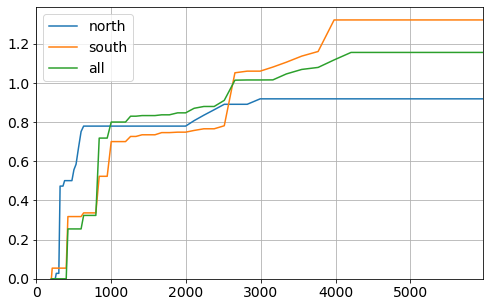

In [48]:
plt.plot(distances, AV_north, label='north')
plt.plot(distances, AV_south, label='south')
plt.plot(distances, AV_all, label='all')
plt.legend()
plt.grid()
plt.xlim([0, np.max(distances)])
_, ymax = plt.ylim()
plt.ylim([0, ymax])